<a href="https://colab.research.google.com/github/erikrowens/Codecademy/blob/main/OKCupid_Date_A_Scientist_Portfolio_Project/OKCupid_Date_A_Scientist_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OKCupide Date-A-Scientist Portfolio Project

##Overview
In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this portfolio project, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

You will also create a presentation about your findings from this OKCupid dataset.

The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. However, the questions you ask and how you answer them are entirely up to you.

In [ ]:
#@title Code: Import libraries
#Required to update the path statement to import a PY file from project folder
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Set the path to the current project folder
#If permanently mounting via the notebook
projectFolder = './drive/My Drive/Colab Notebooks/Codecademy/OKCupid Date-A-Scientist Portfolio Project/'

#Update the path statement so that we can import our PY files for this project
sys.path.insert(1, projectFolder)

# Project Scope

*   Goals
  * The goal of this project is to define and attempt to answer one or more questions using machine learning.
  * Given that the data does not contain any information on successful or failed matches to test a model agains it does not seem wise to try and predict potential matches or potentail categories that could be used to predict matches.
  * Instead I will try to apply a supervised ML model to determine if smoking and drinking predict drug use according to the profile data.
*   Data
  * I will use the *profiles.csv* file supplied from Codecademy and sourced from OKCupid. This file contatins the relevant data that appears to be a subset of user data profiles from OKCupid.
*   Analysis
  * I will use tools such as numpy, pandas, matplotlib, and seaborne to explore, analyse, and visualise the data. And the LogisticRegression ML model from sklearn to attempt to answer our question(s).
  * Once completed I hope to be able draw our conclusions based the goals for the project.





In [ ]:
#@title Code: Import data
profilesDF = pd.read_csv(projectFolder+"profiles.csv")
profilesDF

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term co

# Inspect the data
High level inspection for tidiness, variable type, etc.

In [ ]:
#@title Code: Inspect data
print(profilesDF.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [ ]:
#@title Code: Columns without null entries
print( [c for c in profilesDF.columns if profilesDF[c].isna().sum() == 0] )

['age', 'income', 'last_online', 'location', 'orientation', 'sex', 'status']


##Observations of data

* General observations
  * There are 59,946 rows in the file. Each row would appear to correspond to a user profile on the site.
  * There do not appear to be duplicate entries how no unique indentifier has been provided.
  * Aside from the pair (orientation/sex) the only columns that gave us any useful information about what someone is looking for in a match are found in the "essay" columns
* Duplicates
  * As no unique indentifier has been provided I do not feel that it would be useful to control for duplicates with the aim of removing them. This could be done by select a subset of columns, but we could not be sure that the resulting subset accurately represents the data.
* "Nan" values
  * There are many entries with "NaN" values. The columns range from "diet" to the various "essay0x" columns, and "pets" to name a few.
  * There are in fact only 7 columns out of the 31 that do not contain null entries: ['age', 'income', 'last_online', 'location', 'orientation', 'sex', 'status']

# Data Exploration
Start to look at high level statistics such as mean, etc. and make some initial plot to help identify a direction for our analysis and/or answer the question that we posed ourselves in the project scope.

Column: diet
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
Unique values:
Number of unique values: 19
NaN entries: 24395 out of 59946 or 40.69%


Column: drinks
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
Unique values:
Number of unique values: 7
NaN entries: 2985 out of 59946 or 4.98%


Column: drugs
['never' 'sometimes' nan 'often']
Unique values:
Number of unique values: 4
NaN entries: 14080 out of 59946 or 23.49%


Column: smokes
['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
Unique values:
Number of unique values: 6
NaN entries: 5512 out of 59946 or 9.19%


Column: education
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working 

<Figure size 432x288 with 0 Axes>

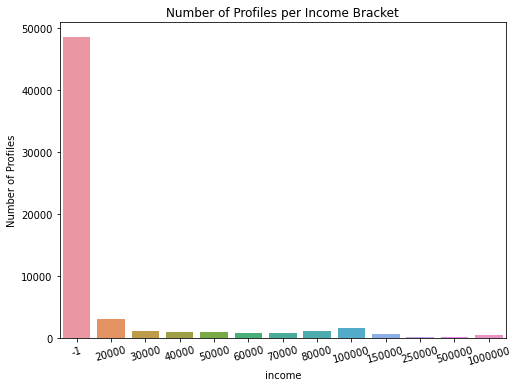

In [ ]:
#@title Code
#Print out information about a specific column in the dataframe
def colInfo(df, column):
  print("Column: "+column)
  print(df[column].unique())
  print("Unique values:")
  tNaN = df[column].isna().sum()
  total = len(df.values)
  ptNaN = (tNaN / total)*100
  print(f"Number of unique values: {len(df[column].unique())}")
  print(f"NaN entries: {tNaN} out of {total} or {ptNaN:.2f}%")
  print("\n")

  return None

_ = [colInfo(profilesDF, c) for c in ['diet', 'drinks', 'drugs', 'smokes', 'education', 'income']]

print("Number of profiles per income bracket and unreported")
print(profilesDF['income'].value_counts())


plt.clf()
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='income', data=profilesDF)
plt.ylabel("Number of Profiles")
plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Number of Profiles per Income Bracket")
plt.xticks(rotation=15)

fig = plt.gcf()
plt.draw()
fig.savefig(projectFolder+'profiles_per_income_bracket.png', dpi=100, format='png')
plt.show()

## Observations
1. 'diet' has a relatively high percentage (~40%) of NaN entries and does not seem reliable
2. 'drinks', 'drugs', 'smokes', and 'education' each have lower percentage of NaN entries, about ~5%, ~23%, ~9%, and ~11%, respectively
3. 'education' has a relatively high number of possible values (unique) at 33
4. 'income' has no NaN entries, but many at (-1) (48,442 entries out of 59,946 total or 80.8%)
  * this is essentially the equivalent of ‘no income provided’ for these rows
  * given the high rate of (-1) in income this column does not seem reliable

# Analysis
Are users (profiles) who smoke and/or drink more likely to take drugs?

In [ ]:
#@title Code: Prepare the data
profilesDF.dropna(subset=['drugs', 'smokes', 'drinks'], inplace=True)
print("Number of rows after dropna(): "+str(len(profilesDF)))

#Notice that I have excluded 'rarely' from the list
drinksList = ['socially', 'often', 'very often', 'desperately']
smokesList = ['sometimes', 'when drinking', 'yes', 'trying to quit']
drugsList = ['sometimes', 'often']
profilesDF['isDrugUser'] = profilesDF['drugs'].apply(lambda x: 1 if x in drugsList else 0)
profilesDF['isSmoker'] = profilesDF['drugs'].apply(lambda x: 1 if x in smokesList else 0)
profilesDF['isDrinker'] = profilesDF['drugs'].apply(lambda x: 1 if x in drinksList else 0)

Number of rows after dropna(): 42495


<Figure size 432x288 with 0 Axes>

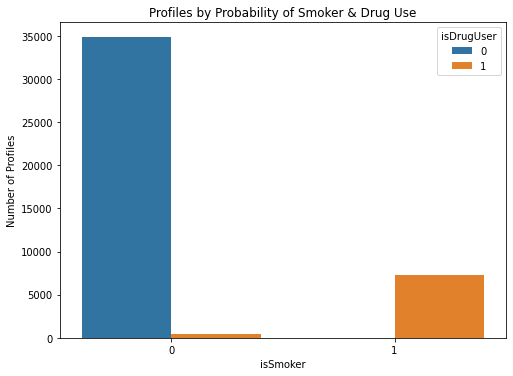

0    35215
1     7280
Name: isSmoker, dtype: int64
0    34830
1     7665
Name: isDrugUser, dtype: int64


In [ ]:
#@title Code: Plot isSmoker & isDrugUser

plt.clf()
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='isSmoker', data=profilesDF, hue="isDrugUser")
plt.ylabel("Number of Profiles")
plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Profiles by Probability of Smoker & Drug Use")

fig = plt.gcf()
plt.draw()
fig.savefig(projectFolder+'smokers_drug_users.png', dpi=100, format='png')
plt.show()

print(profilesDF['isSmoker'].value_counts())
print(profilesDF['isDrugUser'].value_counts())

In [ ]:
#@title Code: Logistic Regression

# Select and Split Data
features = profilesDF[['isSmoker', 'isDrinker']]
drugUser = profilesDF['isDrugUser']

#Split out a subset of profiles to predict on before splitting the testing and training data
trainTest_data, predict_data, trainTest_labels, predict_labels = train_test_split(features, drugUser, train_size=0.99, test_size=0.01)

#training_data, test_data, training_labels, test_labels = train_test_split(features, drugUser, train_size=0.8, test_size=0.2)
training_data, test_data, training_labels, test_labels = train_test_split(trainTest_data, trainTest_labels, train_size=0.8, test_size=0.2)

#Normalize Data
# Scale the feature data so it has mean = 0 and standard deviation = 1
sso = StandardScaler()

train_features = sso.fit_transform(training_data)
test_features = sso.transform(test_data)

# Create and train the model
model = LogisticRegression()
model.fit(training_data, training_labels)

# Score the model on the train data
trainScore = model.score(training_data, training_labels)

# Score the model on the test data
testScore = model.score(test_data, test_labels)

# Analyze the coefficients
print(list(zip(['isSmoker','isDrinker'],model.coef_[0])))

42495
[('isSmoker', 13.144313388293407), ('isDrinker', 10.42853507817707)]


***************************
Probabilities of Drug Use
['Drug User', 'Not Drug User']
[[0.00000000 1.00000000]
 [0.99999918 0.00000082]
 [0.00000000 1.00000000]
 [0.99999918 0.00000082]
 [0.99999918 0.00000082]
 [0.99999918 0.00000082]
 [0.99999918 0.00000082]
 [0.00000000 1.00000000]
 [0.99999918 0.00000082]
 [0.99999918 0.00000082]]
***************************


<Figure size 432x288 with 0 Axes>

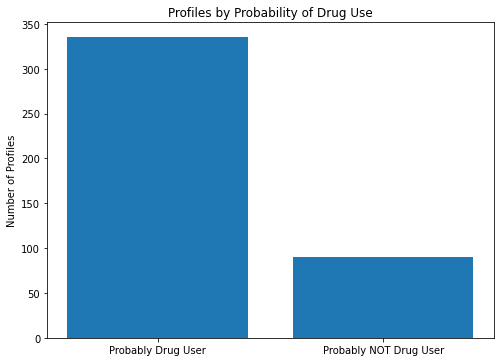

In [ ]:
#@title Code: Predict with the model

np.set_printoptions(formatter={'float_kind': "{:.8f}".format})

# Scale the sample passenger features
sample_profiles = sso.transform(predict_data)

model.predict(sample_profiles)
probabilities = model.predict_proba(sample_profiles)

countHighProbLikleyUser = 0
countHighProbLikleyNotUser = 0
threshold = .8
for prob in probabilities:
  if prob[0] >= threshold: countHighProbLikleyUser += 1
  if prob[1] >= threshold: countHighProbLikleyNotUser += 1

print("***************************")
print("Probabilities of Drug Use")
print(["Drug User", "Not Drug User"])
print(probabilities[:10])
print("***************************")

plt.clf()
fig, ax = plt.subplots(figsize=(8,6))
ax = plt.bar(x=['Probably Drug User', 'Probably NOT Drug User'], height=[countHighProbLikleyUser, countHighProbLikleyNotUser])
plt.ylabel("Number of Profiles")
plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Profiles by Probability of Drug Use")

fig = plt.gcf()
plt.draw()
fig.savefig(projectFolder+'users_vs_not_users.png', dpi=100, format='png')
plt.show()

#Conclusion
* I used logistic regression to test if smoking and drinking are indicators of drug use.
* During the traing and then testing phase the results (coefficient) show that smoking is the dominant feature that predicts drug use.
* In the probability predictions I used 80% as the threshold to predict if the profile was likley to be a drug user or not
* In the prediction subset there were 425 profiles. 344 had a high probability of being drug users and 81 had a high probability of NOT being drug users.

**Question:** Are users (profiles) who smoke and/or drink more likely to take drugs?

**Conclusion:** Smoking and drinking are predictors of drug use with smoking being the dominant feature.